# Load Youtube Data Task Statistics

In [1]:
import pandas as pd

df = pd.read_csv("patent.csv")
df.head(5)

,rootID,|V|,|E|,max_deg,avg_deg,core_number(depth),deg1,deg2,deg3,deg4,...,core2,core3,core4,core5,core6,core7,core8,core9,core10,time(ms)
0,64,37,354,24,9.57,17,24,22,22,21,...,17,17,17,17,17,17,17,17,17,0.0
1,0,517,12454,465,24.09,30,465,465,465,465,...,30,30,30,30,30,30,30,30,30,38.0
2,32,36,338,23,9.39,17,23,20,20,20,...,17,17,17,17,17,17,17,17,17,0.0
3,80,39,398,30,10.21,18,30,24,23,22,...,18,18,18,18,18,18,18,18,18,0.0
4,96,37,349,21,9.43,18,21,21,21,20,...,18,18,18,18,18,18,18,18,18,0.0


# Sort by Time

In [2]:
df.sort_values("time(ms)", inplace=True)
df.tail(10)

,rootID,|V|,|E|,max_deg,avg_deg,core_number(depth),deg1,deg2,deg3,deg4,...,core2,core3,core4,core5,core6,core7,core8,core9,core10,time(ms)
6876,16697,109,4232,93,38.83,64,93,93,92,92,...,64,64,64,64,64,64,64,64,64,729769.0
767,17050,93,3197,80,34.38,60,80,78,78,77,...,60,60,60,60,60,60,60,60,60,1006208.0
3755,16850,104,3914,88,37.63,64,88,88,87,87,...,64,64,64,64,64,64,64,64,64,1053326.0
4523,17012,95,3332,82,35.07,60,82,80,80,79,...,60,60,60,60,60,60,60,60,60,1083755.0
5063,17445,69,1786,65,25.88,43,65,65,62,62,...,43,43,43,43,43,43,43,43,43,1198085.0
1328,17297,78,2282,69,29.26,48,69,69,69,67,...,48,48,48,48,48,48,48,48,48,1220241.0
5278,17397,72,1950,66,27.08,45,66,66,64,64,...,45,45,45,45,45,45,45,45,45,1411622.0
66,17296,79,2346,69,29.70,49,69,69,69,67,...,49,49,49,49,49,49,49,49,49,1757738.0
1288,17153,88,2873,75,32.65,55,75,75,75,74,...,55,55,55,55,55,55,55,55,55,2658704.0
3056,17359,76,2167,68,28.51,47,68,68,68,66,...,47,47,47,47,47,47,47,47,47,2878700.0


# |V| v.s. Time Plot

In [3]:
import numpy as np

x = np.array(df['|V|'])
y = np.array(df['time(ms)'])

### Ratio of {Total Time by All Tasks} / {Time of the Most Expensive Task}

In [4]:
np.sum(y)/np.max(y)

8.812749157605865

In [5]:
x = x[:-1]
y = y[:-1]

### Kick out the last point which is an outlier that is on the far upper-right corner

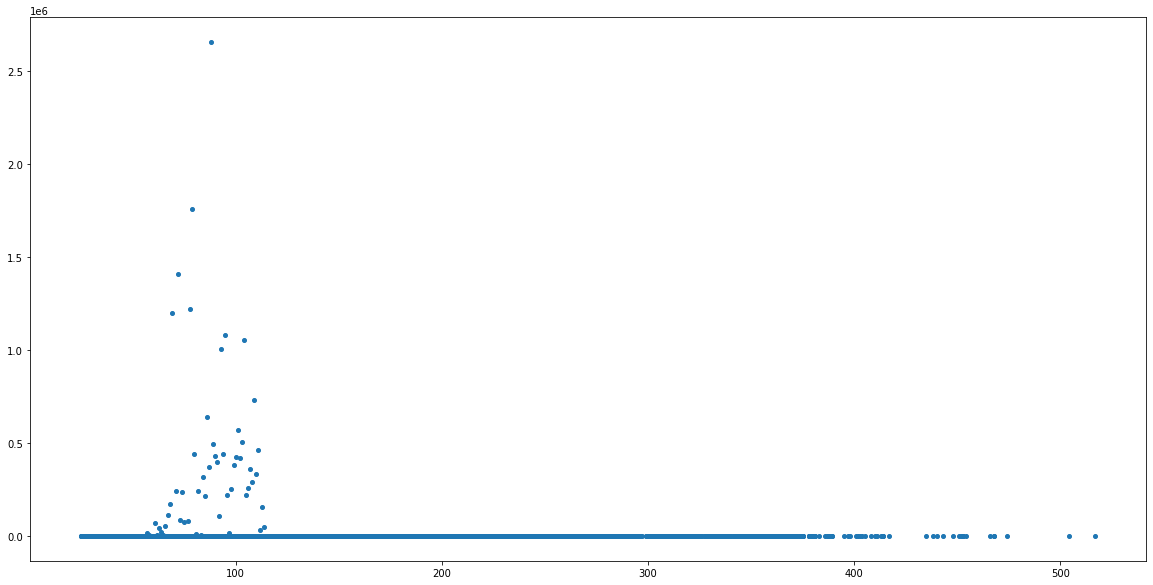

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# |E| v.s. Time Plot

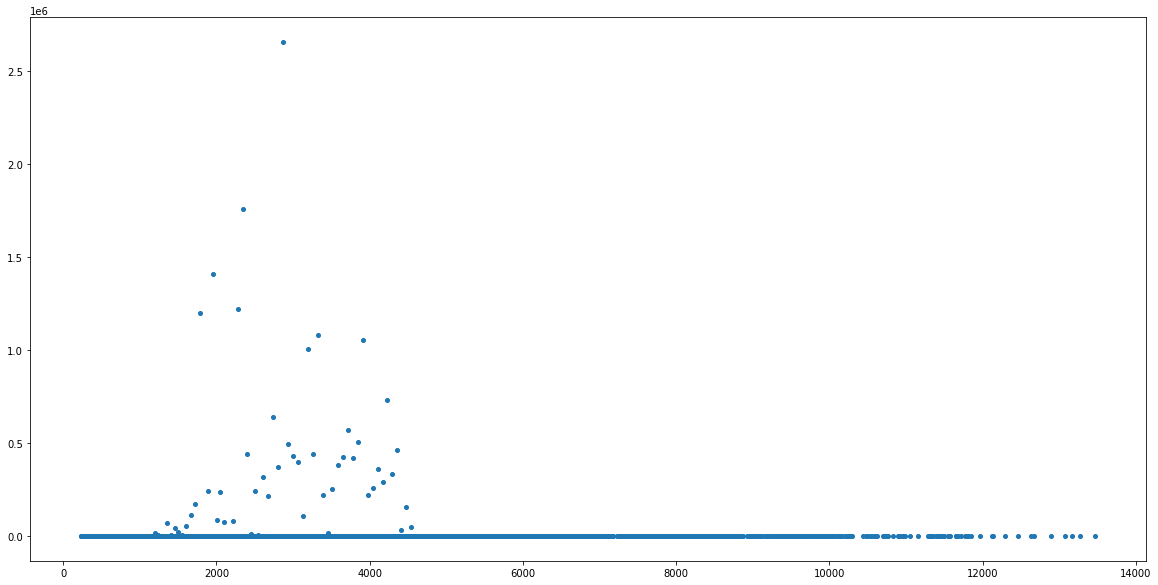

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['|E|'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# max_deg v.s. Time Plot

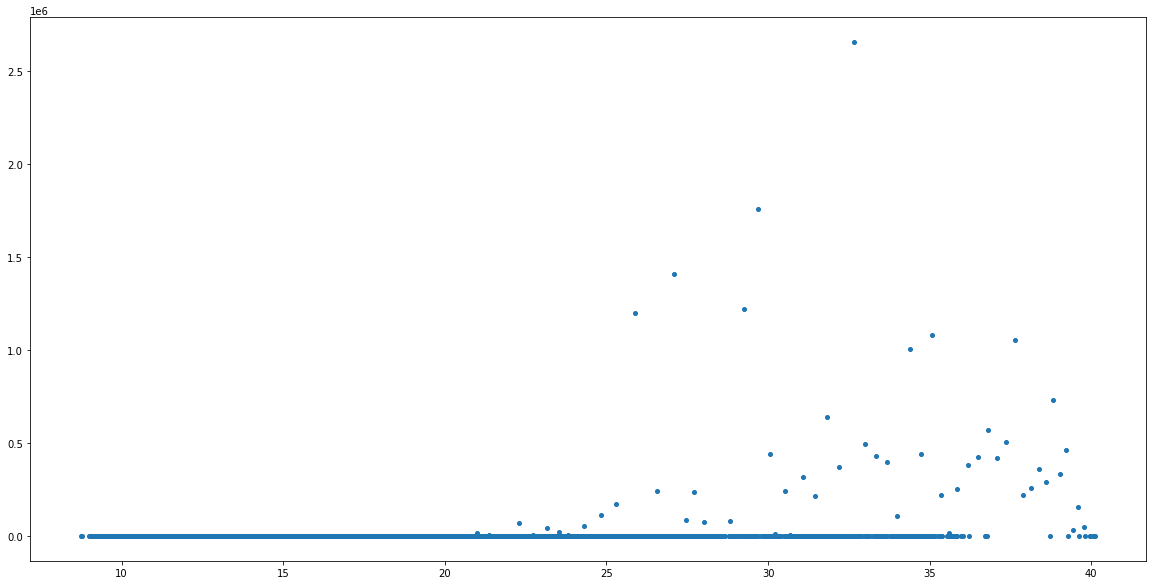

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['avg_deg'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# avg_deg v.s. Time Plot

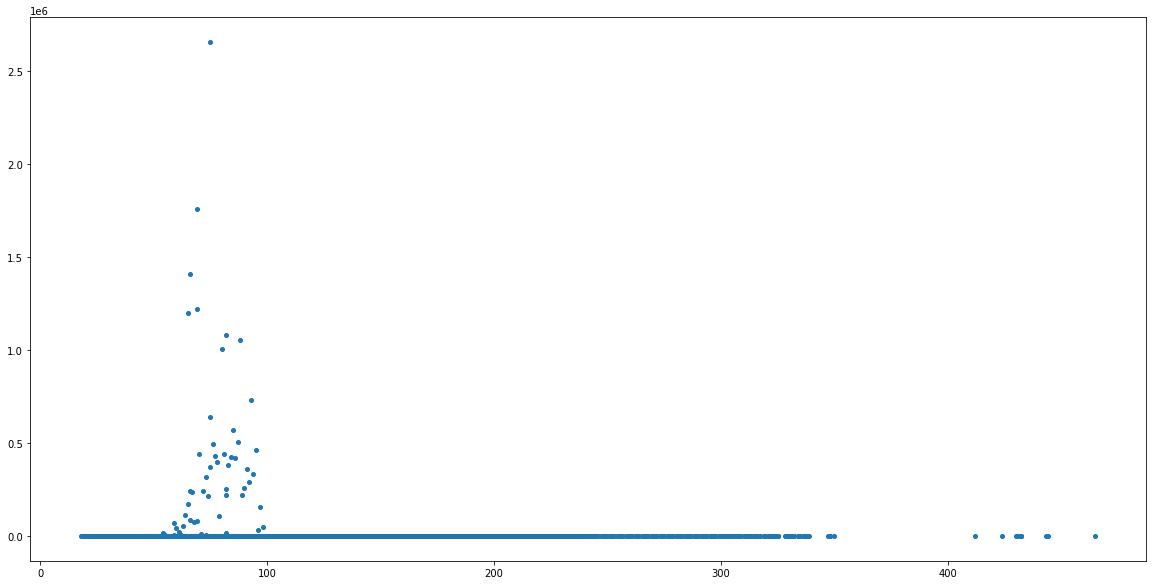

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['max_deg'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# core_number(depth) v.s. Time Plot

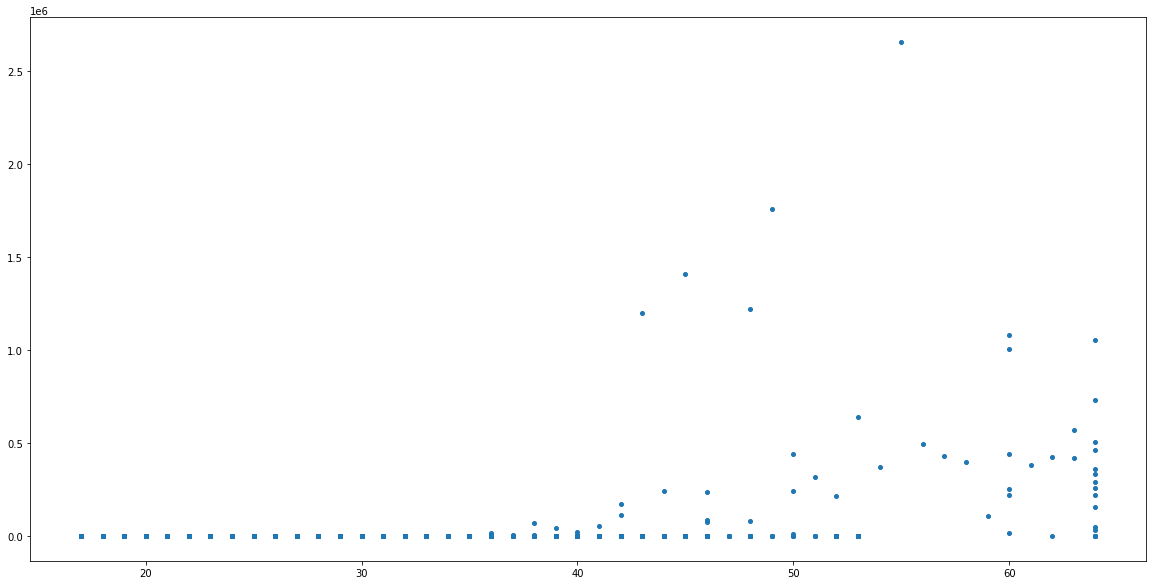

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df['core_number(depth)'])
y = np.array(df['time(ms)'])

x = x[:-1]
y = y[:-1]

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=16)

# SVM Regression over All Features

In [11]:
X = np.array(df)

We use all data for training, and simply check if the training error is small;
if this is not the case, it won't generalize to test data unseen before

In [12]:
X_train = X[:, 1:-1] # 0 is rootID (spawning vertex)
y_train = X[:, -1]

In [13]:
%%time

from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)
yhat = svr.predict(X_train)

# check the last 10 tasks (sorted by time so 10 most long-running tasks)
list(zip(y_train[-10:], yhat[-10:])) # actual time v.s. predicted time

CPU times: user 4.33 s, sys: 271 ms, total: 4.6 s
Wall time: 4.35 s


[(729769.0, 5.526851446407024),
 (1006208.0, 3.8446129903851904),
 (1053326.0, 4.990282158927296),
 (1083755.0, 4.068919570770553),
 (1198085.0, 1.4764157437871948),
 (1220241.0, 2.316730661776419),
 (1411622.0, 1.7461242210934493),
 (1757738.0, 2.4297908344738444),
 (2658704.0, 3.3213098988126015),
 (2878700.0, 2.110135589364859)]